In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Зниження розмірності і візуалізація даних

Застосуйте методи зниження розмірності sklearn.decomposition.PCA іsklearn.manifold.TSNEдля візуалізації даних, з якими ви працювали в лабораторній No 2(знижуючи розмірність до двох). Візуалізуйте результат.

In [2]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
X = df.drop(['id'], 1)
X
y = df['Class']
y


0        1
1        1
2        1
3        1
4        1
        ..
18180    0
18181    0
18182    0
18183    0
18184    0
Name: Class, Length: 18185, dtype: int64

In [4]:
standartScaler = StandardScaler()
X_sc = standartScaler.fit_transform(X)
X_sc

array([[-1.70363043, -4.80374424,  0.41792669, ...,  0.83958835,
        -2.66379989,  0.90621843],
       [-2.83847845, -6.22078914, -0.83561103, ...,  1.83721534,
        -2.6354184 ,  0.90621843],
       [-2.71851854, -6.09140363, -0.77169963, ...,  2.3835873 ,
        -2.60595002,  0.90621843],
       ...,
       [-0.45768318,  0.25018706, -0.6857677 , ..., -0.37389933,
         0.75045135, -1.10348671],
       [-0.73372729, -0.02285299, -0.82824173, ..., -1.08116545,
         0.7868348 , -1.10348671],
       [-0.61513056,  0.11322075, -0.81671191, ..., -0.53075529,
         0.84669604, -1.10348671]])

Text(0.5, 1.0, 'PCA')

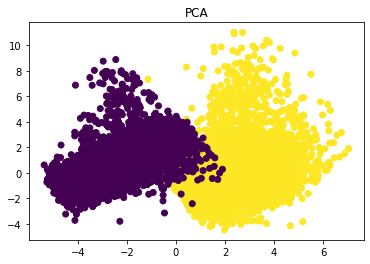

In [5]:
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_sc)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

In [6]:
pca.explained_variance_ratio_

array([0.65538519, 0.2403441 ])

In [7]:
pca.singular_values_

array([362.07730722, 219.26520818])

Text(0.5, 1.0, 'TSNE')

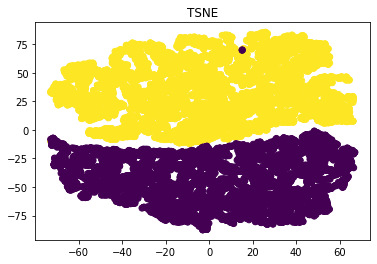

In [8]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_sc)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('TSNE')

# 2. Кластерний аналіз
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації)з глибиною 64, 32, 16 та8 рівнів для будь-якого обраного самостійно зображення.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

(623, 1280, 3)


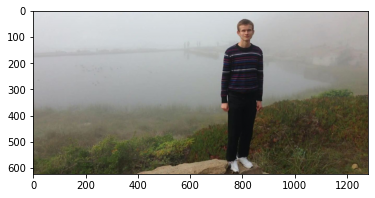

In [10]:
img = plt.imread('vitalik.jpg')
img = img/255
print(img.shape)
plt.imshow(img)

[[0.8745098  0.87058824 0.8627451 ]
 [0.8745098  0.87058824 0.8627451 ]
 [0.8745098  0.87058824 0.8627451 ]
 ...
 [0.40784314 0.33333333 0.16862745]
 [0.38431373 0.30980392 0.14509804]
 [0.34901961 0.2745098  0.10980392]]
[[0.86666667 0.87058824 0.88627451]
 [0.5372549  0.5254902  0.46666667]
 [0.59607843 0.59607843 0.56470588]
 [0.7254902  0.74901961 0.74901961]
 [0.05098039 0.05882353 0.05490196]
 [0.84313725 0.84705882 0.8627451 ]
 [0.25882353 0.19607843 0.13333333]
 [0.85882353 0.8745098  0.88627451]
 [0.81176471 0.82745098 0.83921569]
 [0.3254902  0.20392157 0.1254902 ]
 [0.48235294 0.37254902 0.3254902 ]
 [0.85490196 0.85882353 0.87843137]
 [0.65490196 0.65490196 0.6627451 ]
 [0.79607843 0.81568627 0.83137255]
 [0.18039216 0.19215686 0.08627451]
 [0.70588235 0.70980392 0.7254902 ]
 [0.63137255 0.64705882 0.65098039]
 [0.2745098  0.28627451 0.18039216]
 [0.49803922 0.4745098  0.42745098]
 [0.61176471 0.61960784 0.61568627]
 [0.78431373 0.80784314 0.80784314]
 [0.61176471 0.6313725

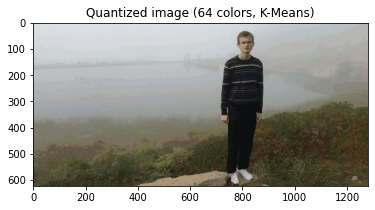

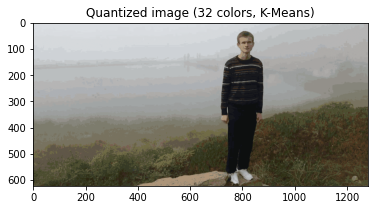

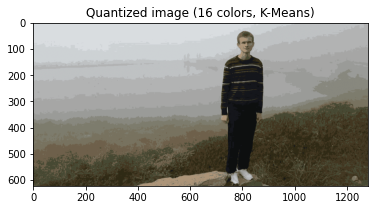

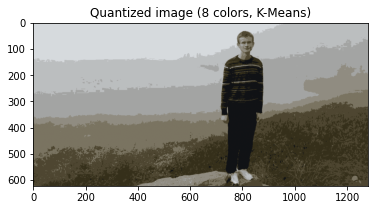

In [11]:
n_colors = [64, 32, 16, 8]
w, h, d = img.shape
img_array = img.reshape(w*h, d)
print(img_array)
img_array_sample = shuffle(img_array, random_state=0, n_samples=100)
print(img_array_sample)
k=0
for n in n_colors:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(img_array_sample)
    labels = kmeans.predict(img_array)
    plt.figure(k)
    plt.title(f'Quantized image ({n} colors, K-Means)')
    plt.imshow(kmeans.cluster_centers_[labels].reshape(w, h, -1))
    k += 1


2) Згенеруйте набір синтетичних даних у вигляді суміші двох гаусіан за допомогою функції:

(застосуйте їїдвічі з різними mean і cov, результат об’єднайте)
Розділіть сумішза допомогою EM алгоритму (sklearn.mixture.GaussianMixture), зверніть увагу на параметр covariance_type. За допомогою атрибутів weights_ іcovariances_відновіть їхні значення, порівняйте з оригінальними. Візуалізуйте результат.

/var/folders/3y/t3tpk5tn1q7dwkh3t9by9p780000gn/T/ipykernel_33643/2050033806.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mean1, cov1, 500)
/var/folders/3y/t3tpk5tn1q7dwkh3t9by9p780000gn/T/ipykernel_33643/2050033806.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean2, cov2, 500)


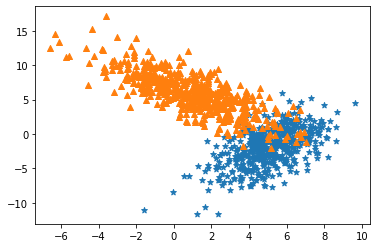

In [12]:
mean1 = [5, -2]
cov1 = [[3, 7], 
        [-1, 1]]

mean2 = [1, 6]
cov2 = [[8, -10], 
        [0, 2.5]]

X1 = np.random.multivariate_normal(mean1, cov1, 500)
X2 = np.random.multivariate_normal(mean2, cov2, 500)

plt.scatter(X1[:, 0], X1[:, 1], marker = '*', color='#1f77b4')
plt.scatter(X2[:, 0], X2[:, 1], marker = '^', color='#ff7f0e')

In [13]:
X = np.concatenate([X1, X2])

indexes = np.arange(len(X))
np.random.shuffle(indexes)
X = X[indexes]

In [14]:
from sklearn.mixture import GaussianMixture
EM = GaussianMixture(n_components=2)
EM.fit(X)

GaussianMixture(n_components=2)

In [15]:
EM.means_

array([[ 0.87981609,  6.0213631 ],
       [ 5.04579594, -1.82964087]])

In [16]:
EM.covariances_

array([[[ 5.60881452, -5.2169243 ],
        [-5.2169243 ,  8.48734125]],

       [[ 2.24156445,  2.23655774],
        [ 2.23655774,  7.49286116]]])

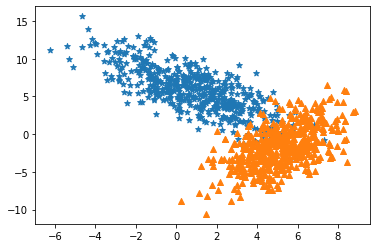

In [17]:
X1_new = np.random.multivariate_normal(EM.means_[0], EM.covariances_[0], 500)
X2_new = np.random.multivariate_normal(EM.means_[1], EM.covariances_[1], 500)

plt.scatter(X1_new[:, 0], X1_new[:, 1], marker = '*', color='#1f77b4')
plt.scatter(X2_new[:, 0], X2_new[:, 1], marker = '^', color='#ff7f0e')

# 3. Обробка текстових даних
Завантажте набір текстових даних (з мітками класів).Проведіть передобробкуданих (видаліть стоп-слова, пунктуацію), за допомогою wordcloudзробіть візуалізацію найбільш поширених слів абоn-gramу кожному класі. Векторизуйте тексти(наприклад за допомогою sklearn.feature_extraction.text .TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. Застосуйте алгоритм LDAдо кожного класу, визначте декілька тематик(sklearn.decomposition.LatentDirichletAllocation)

In [18]:
df = pd.read_csv('kick_starter_nlp.csv')
print(df.shape)
df.head()

(215513, 3)


,Unnamed: 0,blurb,state
0,1,"Using their own character, users go on educati...",failed
1,2,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,3,"A small indie press, run as a collective for a...",failed
3,4,Zylor is a new baby cosplayer! Back this kicks...,failed
4,5,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed


In [19]:
df = df.drop(['Unnamed: 0'],1)
df

,blurb,state
0,"Using their own character, users go on educati...",failed
1,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,"A small indie press, run as a collective for a...",failed
3,Zylor is a new baby cosplayer! Back this kicks...,failed
4,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed
...,...,...
215508,"This new, designer approach to family wall art...",failed
215509,Im looking to build a urban youth center to he...,failed
215510,My plan is to create the most realistic and ac...,failed
215511,Create unique and fantastic gifts: Mash works ...,failed


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import re

In [21]:
nltk.download("stopwords")
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vchikhladze/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vchikhladze/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
def prepare_data(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','',text)
    clean_text = []
    stemmer = PorterStemmer()
    for word in word_tokenize(text):
        if word not in stop_words and word.isalpha():
            word = stemmer.stem(word)
            clean_text.append(word)
    return ' '.join(clean_text) 


In [23]:
df.blurb = df.blurb.apply(prepare_data)
df.head()

,blurb,state
0,use charact user go educ quest around virtual ...,failed
1,microfli quadcopt pack wifi sensor processor u...,successful
2,small indi press run collect author want selfp...,failed
3,zylor new babi cosplay back kickstart help fun...,failed
4,hato boyfriend meet skeleton comedi date sim p...,failed


In [24]:
#!pip install wordcloud
from wordcloud import WordCloud

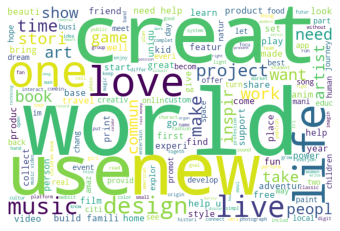

In [25]:
text = ''
for msg in df[df['state'] == 'failed']['blurb']:
    text += msg + ' '
wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

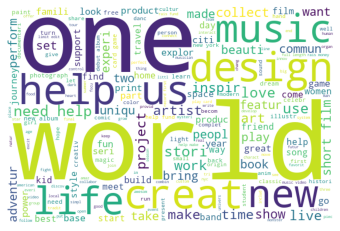

In [26]:
text = ''
for msg in df[df['state'] == 'successful']['blurb']:
    text += msg + ' '
wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X = df.blurb
y = df.state 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidfvectorizer = TfidfVectorizer(stop_words='english')
fitted = tfidfvectorizer.fit(X_train)
X_train = fitted.transform(X_train)
X_test = fitted.transform(X_test)

In [30]:
X_train

<150859x79036 sparse matrix of type '<class 'numpy.float64'>'
	with 1595459 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
forest = RandomForestClassifier(n_estimators=10, max_depth=50).fit(X_train, y_train)

pred = forest.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      failed       0.63      0.54      0.58     32248
  successful       0.60      0.68      0.64     32406

    accuracy                           0.61     64654
   macro avg       0.61      0.61      0.61     64654
weighted avg       0.61      0.61      0.61     64654



In [35]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
data_vector = vectorizer.fit_transform(X)
lda = LatentDirichletAllocation(n_components = 2).fit(data_vector)


In [36]:
feature_names = vectorizer.get_feature_names()
num_top_words = 10

for topic_ind, topic in enumerate(lda.components_):
    print(f'topic{topic_ind}: {[feature_names[i] for i in topic.argsort()[-1: -num_top_words:-1]]}')

topic0: ['book', 'game', 'stori', 'world', 'film', 'life', 'design', 'art', 'new']
topic1: ['help', 'make', 'new', 'music', 'need', 'album', 'record', 'want', 'creat']
